# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [2]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 450,500,700])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 450 500 700]


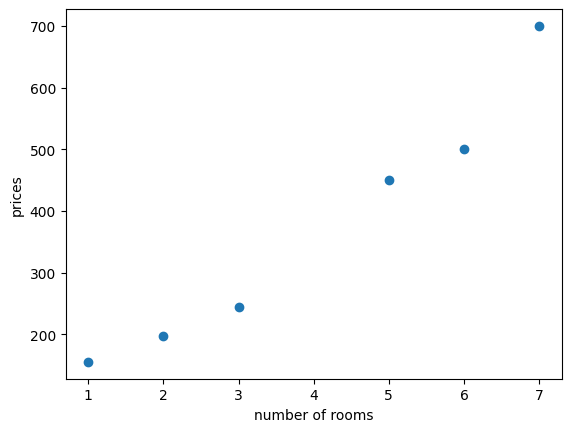

In [3]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [4]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [5]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

In [6]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 93.92506742353324
Base price: 26.755283808302693
778.1558231965686


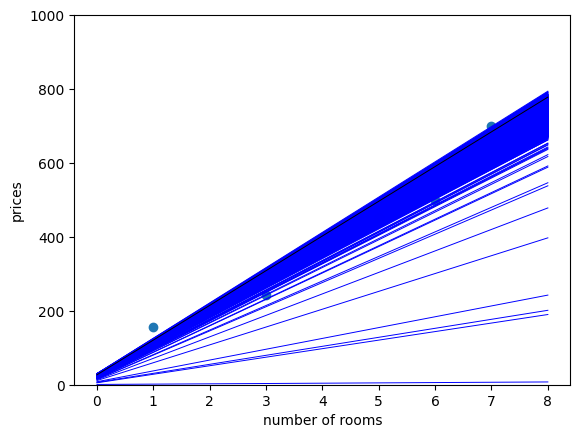

In [7]:
import random

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.001, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        if True:
            utils.draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,1000)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

new_price = 93.92506742353324*8 + 26.755283808302693
print(new_price)

### Root mean squared error function

In [8]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

### Plotting the error function

Price per room: 84.80220415714474
Base price: 25.48399572856081


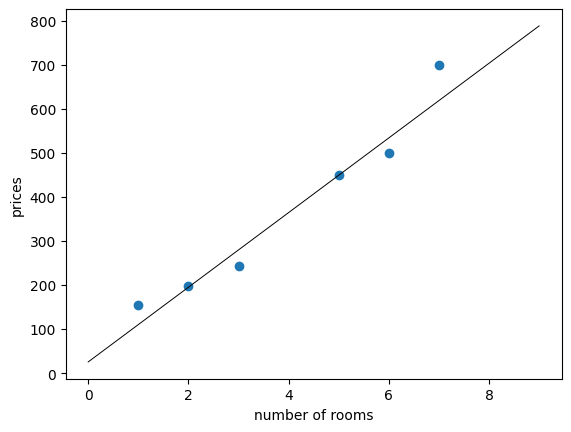

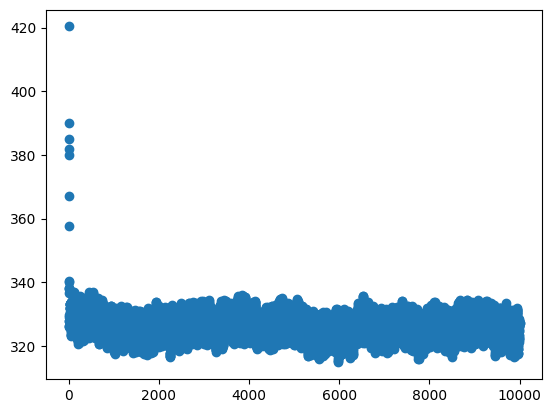

(84.80220415714474, 25.48399572856081)

In [9]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression in Turi Create

In [11]:
import turicreate as tc

datadict = {
    'features': features,
    'labels'  : labels,
}

data = tc.SFrame(datadict)

data

ModuleNotFoundError: No module named 'turicreate'

In [12]:
model = tc.linear_regression.create(data, target='labels')

NameError: name 'tc' is not defined

In [13]:
model.coefficients

NameError: name 'model' is not defined

In [14]:
new_point = tc.SFrame({'features': [4]})

model.predict(new_point)

NameError: name 'tc' is not defined

In [15]:
y = mx + b
y = rm + b
predicted price = num rooms * price per room + base price

y = y2 + x + b

SyntaxError: invalid syntax (901152068.py, line 3)

[[  1.   0.   1.   0.   0.   1.   0.   0.   0.   1.]
 [  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


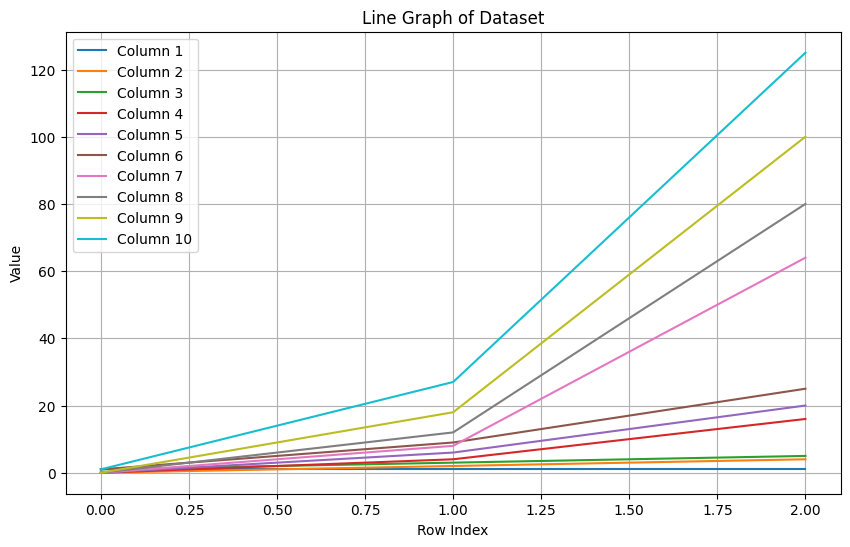

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from matplotlib import pyplot as plt
X = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(degree=3)
data = poly.fit_transform(X)
print(data)

# Plotting the dataset as a line graph
plt.figure(figsize=(10, 6))

# Plot each column as a separate line
for i in range(data.shape[1]):
    plt.plot(data[:, i], label=f'Column {i+1}')

# Adding titles and labels
plt.title('Line Graph of Dataset')
plt.xlabel('Row Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

[  0.           2.44897959   4.89795918   7.34693878   9.79591837
  12.24489796  14.69387755  17.14285714  19.59183673  22.04081633
  24.48979592  26.93877551  29.3877551   31.83673469  34.28571429
  36.73469388  39.18367347  41.63265306  44.08163265  46.53061224
  48.97959184  51.42857143  53.87755102  56.32653061  58.7755102
  61.2244898   63.67346939  66.12244898  68.57142857  71.02040816
  73.46938776  75.91836735  78.36734694  80.81632653  83.26530612
  85.71428571  88.16326531  90.6122449   93.06122449  95.51020408
  97.95918367 100.40816327 102.85714286 105.30612245 107.75510204
 110.20408163 112.65306122 115.10204082 117.55102041 120.        ]


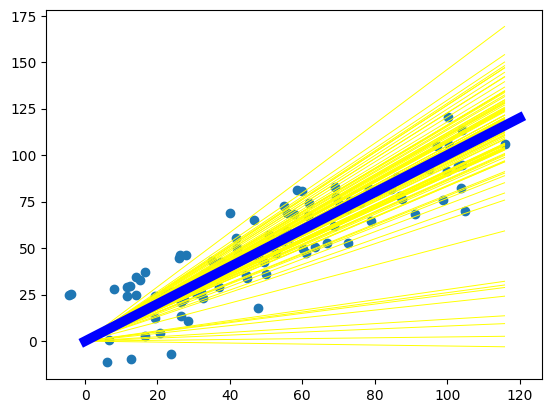

In [96]:
# Generate slightly random but relatively increasing arrays
np.random.seed(0)  # For reproducibility
import random
# Generate a base array and add small random variations
x_base = np.linspace(1, 100, 100)
y_base = np.linspace(1, 100, 100)

# Add small random noise
x = x_base + np.random.normal(0, 10, x_base.shape)
y = y_base + np.random.normal(0, 10, y_base.shape)
starting = y[0]
ending = y[len(y) - 1]

def square_rule(static, v, actualvalue, learningrate): 
    # return an adjusted bias and the variable value
    # not the x or y value.
    # the x is the room count, the y is the total price. 
    p = static * v # predict the thing
    pp = actualvalue - p # find the delta
    static += pp*learningrate
    return static

def train(): 
    base_value = random.random()
    for i in range(0, len(x)): 
        base_value = square_rule(base_value, x[i], y[i], 0.01) 
        utils.draw_line(base_value, 0, 'yellow', starting=0, ending=max(x))
    line = np.linspace(0, 120)
    print(line)
    plt.plot(line, line, linestyle='-', color='blue', linewidth=7)
    plt.scatter(x, y)
    plt.show()

train()



